Problem 1: Next in Queue
Each user on a music app should have a queue of songs to play next. Implement the class Queue using a singly linked list. Recall that a queue is a First-In-First-Out (FIfO) data structure where elements are added to the end (the tail) and removed from the front (the head).

Your queue must have the following methods:

__init()__: Initializes an empty queue (provided)
enqueue(): Accepts a tuple of two strings (song, artist) and adds the element with the specified tuple to the end of the queue.
dequeue(): Removes and returns the element at the front of the queue. If the queue is empty, returns None.
peek(): Returns the value of the element at the front of the queue without removing it. If the queue is empty, returns None.
is_empty(): Returns True if the queue is empty, and False otherwise.

In [8]:
class Node:
	def __init__(self, value, next=None):
		self.value = value
		self.next = next

# For testing
def print_queue(head):
    current = head.front
    while current:
        print(current.value, end=" -> " if current.next else "")
        current = current.next
    print()

class Queue:
    def __init__(self):
        self.front = None
        self.rear = None
    
    def is_empty(self):
        return self.front == None 

    def enqueue(self, val):
        new_node = Node(val)
        if not self.front:
             self.front = new_node
             self.rear = new_node
        else:
             self.rear.next = new_node
             self.rear = self.rear.next
    
    def dequeue(self):
        if not self.front:
            return None 
        elif self.front == self.rear:
            first = self.front 
            self.front = None 
            self.rear = None 
            return first.value
        else:
            first =self.front 
            second = self.front.next 
            self.front = second 
            return first.value
    
    def peek(self):
        if not self.front:
            return None 
        else:
            return self.front.value
    
# Create a new Queue
q = Queue()

# Add elements to the queue
q.enqueue(('Love Song', 'Sara Bareilles'))
q.enqueue(('Ballad of Big Nothing', 'Elliot Smith'))
q.enqueue(('Hug from a Dinosaur', 'Torres'))
print_queue(q)

# View the front element
print("Peek: ", q.peek()) 

# Remove elements from the queue
print("Dequeue: ", q.dequeue()) 
print("Dequeue: ", q.dequeue()) 

# Check if the queue is empty
print("Is Empty: ", q.is_empty()) 

# Remove the last element
print("Dequeue: ", q.dequeue()) 

# Check if the queue is empty
print("Is Empty:", q.is_empty()) 

# ('Love Song', 'Sara Bareilles') -> ('Ballad of Big Nothing', 'Elliot Smith') 
# -> ('Hug from a Dinosaur', 'Torres')
# Peek:  ('Love Song', 'Sara Bareilles')
# Dequeue:  ('Love Song', 'Sara Bareilles')
# Dequeue:  ('Ballad of Big Nothing', 'Elliot Smith')
# Is Empty:  False
# Dequeue:  ('Hug from a Dinosaur', 'Torres')
# Is Empty: True


('Love Song', 'Sara Bareilles') -> ('Ballad of Big Nothing', 'Elliot Smith') -> ('Hug from a Dinosaur', 'Torres')
Peek:  ('Love Song', 'Sara Bareilles')
Dequeue:  ('Love Song', 'Sara Bareilles')
Dequeue:  ('Ballad of Big Nothing', 'Elliot Smith')
Is Empty:  False
Dequeue:  ('Hug from a Dinosaur', 'Torres')
Is Empty: True


### Problem 2: Merge Playlists
### You are given the head of two linked lists, playlist1 and playlist2 with lengths n and m respectively. Remove playlist1's nodes from the ath to the bth node and put playlist2 in its place. Assume the lists are 0-indexed.
### 
### The blue edges and nodes in the figure below indicate the result:

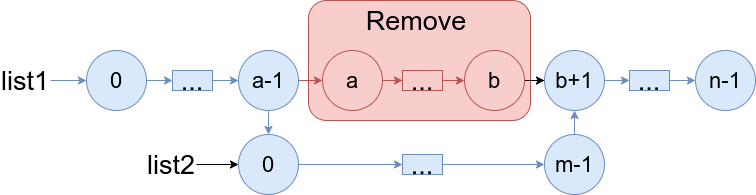

In [ ]:
class Node:
	def __init__(self, value, next=None):
		self.value = value
		self.next = next

# For testing
def print_linked_list(head):
    current = head
    while current:
        print(current.value, end=" -> " if current.next else "")
        current = current.next
    print()

def merge_playlists(playlist1, playlist2, a, b):
    # iterate to pre of the first node to be removed
    dummy =  Node(0, playlist1)
    current = playlist1
    for i in range(a - 1):
        current = current.next
    # iterate to the next of the last node to be remove
    to_continue = current.next
    for j in range(b - a + 1):
        to_continue = to_continue.next

    # attach the playlist2 to current and iterate to 
    # the end of playlist2
    current.next = playlist2
    while current.next:
         current = current.next 
    
    # attach continue to the end of playlist2
    current.next = to_continue
    return dummy.next

playlist1 = Node(('Flea', 'St. Vincent'),
                Node(('Juice', 'Lizzo'), 
                    Node(('Tenderness', 'Jay Som'),
                        Node(('Ego Death', 'The Internet'),
                            Node(('Empty', 'Kevin Abstract'))))))

playlist2 = Node(('Dreams', 'Solange'), Node(('First', 'Gallant')))

print_linked_list(merge_playlists(playlist1, playlist2, 2, 3))

# ('Flea', 'St.Vincent') -> ('Juice', 'Lizzo') -> ('Dreams', 'Solange') -> ('First', 'Gallant')
# -> ('Empty', 'Kevin Abstract')

('Flea', 'St. Vincent') -> ('Juice', 'Lizzo') -> ('Dreams', 'Solange') -> ('First', 'Gallant') -> ('Empty', 'Kevin Abstract')


Problem 3: Shuffle Playlist
You are given the head of a singly linked list playlist. The list can be represented as:

L0 → L1 → … → Ln - 1 → Ln

Shuffle the playlist to have the following form:

L0 → Ln → L1 → Ln - 1 → L2 → Ln - 2 → …

You may not modify the values in the list's nodes. Only the order of the nodes themselves may be changed. Return the head of the shuffled list.

Evaluate the time and space complexity of your solution. Define your variables and provide a rationale for why you believe your solution has the stated time and space complexity.

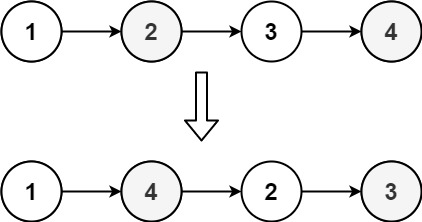

In [14]:
class Node:
	def __init__(self, value, next=None):
		self.value = value
		self.next = next

# For testing
def print_linked_list(head):
    current = head
    while current:
        print(current.value, end=" -> " if current.next else "")
        current = current.next
    print()

def shuffle_playlist(playlist):
    if not playlist or not playlist.next:
        return playlist
    
    # Step 1: Find the middle of the list
    slow, fast = playlist, playlist
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    
    # Step 2: Reverse the second half
    prev, curr = None, slow.next
    slow.next = None  # Split the list into two halves
    while curr:
        next_node = curr.next
        curr.next = prev
        prev = curr
        curr = next_node
    
    # Step 3: Merge the two halves
    first, second = playlist, prev
    while second:
        next_first, next_second = first.next, second.next
        first.next = second
        second.next = next_first
        first = next_first
        second = next_second
    
    return playlist
    
playlist1 = Node(1, Node(2, Node(3, Node(4))))

playlist2 = Node(('Respect', 'Aretha Franklin'),
                Node(('Superstition', 'Stevie Wonder'),
                    Node(('Wonderwall', 'Oasis'),
                        Node(('Like a Prayer', 'Madonna'),
                            Node(('Bohemian Rhapsody', 'Queen'))))))

print_linked_list(shuffle_playlist(playlist1))
print_linked_list(shuffle_playlist(playlist2))

# 1 -> 4 -> 2 -> 3
# ('Respect', 'Aretha Franklin') -> ('Bohemian Rhapsody', 'Queen') -> ('Superstition', 'Stevie Wonder') ->
# ('Like a Prayer', 'Madonna') -> ('Wonderwall', 'Oasis')


1 -> 4 -> 2 -> 3
('Respect', 'Aretha Franklin') -> ('Bohemian Rhapsody', 'Queen') -> ('Superstition', 'Stevie Wonder') -> ('Like a Prayer', 'Madonna') -> ('Wonderwall', 'Oasis')


Problem 4: Shared Music Taste
Given the heads of two singly linked lists playlist_a and playlist_b, return the node at which the two lists intersect. If the two lists have no intersection at all, return None.

There are no cycles anywhere in either linked list. The linked lists must retain their original structure after the function returns.

Evaluate the time and space complexity of your solution. Define your variables and provide a rationale for why you believe your solution has the stated time and space complexity.

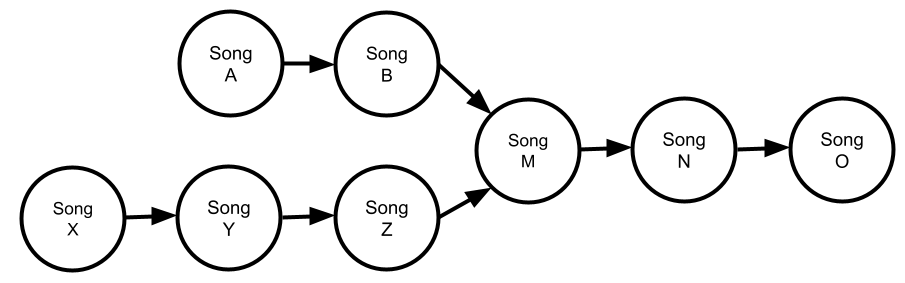

In [16]:
class Node:
	def __init__(self, value, next=None):
		self.value = value
		self.next = next

# For testing
def print_linked_list(head):
    current = head
    while current:
        print(current.value, end=" -> " if current.next else "")
        current = current.next
    print()

def get_length(head):
    length = 0
    while head:
        length += 1
        head = head.next
    return length

def playlist_overlap(playlist_a, playlist_b):
    len_a = get_length(playlist_a)
    len_b = get_length(playlist_b)

    # Advance the longer list's pointer
    while len_a > len_b:
        playlist_a = playlist_a.next
        len_a -= 1
    while len_b > len_a:
        playlist_b = playlist_b.next
        len_b -= 1
    
    # Move both pointers together
    while playlist_a and playlist_b:
        if playlist_a == playlist_b:
            return playlist_a  # return the actual node
        playlist_a = playlist_a.next
        playlist_b = playlist_b.next

    return None
    

playlist_a = Node('Song A', Node('Song B'))
playlist_b = Node('Song X', Node('Song Y', Node('Song Z')))
shared_segment = Node('Song M', Node('Song N', Node('Song O')))

playlist_a.next.next = shared_segment
playlist_b.next.next.next = shared_segment

print((playlist_overlap(playlist_a, playlist_b)).value)

# Song M

Song M


Problem 5: Double Listening Count
A new artist is blowing up and the number of people listening to their music has doubled in the last month. Given the head of a non-empty linked list monthly_listeners representing a non-negative integer without leading zeroes, return the head of the linked list after doubling its integer value.

Evaluate the time and space complexity of your solution. Define your variables and provide a rationale for why you believe your solution has the stated time and space complexity.

In [17]:
class Node:
	def __init__(self, value, next=None):
		self.value = value
		self.next = next

# For testing
def print_linked_list(head):
    current = head
    while current:
        print(current.value, end=" -> " if current.next else "")
        current = current.next
    print()

def double_listeners(monthly_listeners):
    def reverse_list(head):
        prev = None
        current = head
        while current:
            next_node = current.next
            current.next = prev
            prev = current
            current = next_node
        return prev

    head = reverse_list(monthly_listeners)
    
    current = head
    carry = 0
    while current:
        doubled_value = current.value * 2 + carry
        current.value = doubled_value % 10  # Update the current node's value
        carry = doubled_value // 10  # Carry over the remaining part of the doubled value
        if current.next is None and carry > 0:
            current.next = Node(carry)  # If it's the last node and there's a carry, add a new node
            break
        current = current.next

    return reverse_list(head)
    

monthly_listeners1 = Node(1, Node(8, Node(9))) # 189
monthly_listeners2 = Node(9, Node(9, Node(9))) # 999

print_linked_list(double_listeners(monthly_listeners1))
print_linked_list(double_listeners(monthly_listeners2))

# 3 -> 7 -> 8
# Example 1 Explanation: 189 * 2 = 378
# 
# 1 -> 9 -> 9 -> 8
# Example 2 Explanation: 999 * 2 = 1998

3 -> 7 -> 8
1 -> 9 -> 9 -> 8
